In [74]:
from ebaysdk.finding import Connection
import pandas as pd
from datetime import datetime, timedelta


api = Connection(config_file = 'ebay.yaml')

class APIError(Exception):
    """An API Error Exception"""

    def __init__(self, response):
        self.response = response

    def __str__(self):
        return "APIError: error = {}".format(self.response.dict()['errorMessage'])


def api2df(from_time, to_time):
        api_request = {
        # 16231 - saxophones
        'categoryId': '16231',
        'keywords': 'sax',
        'outputSelector' : [
                        'SellerInfo',
                        'StoreInfo',
                ],
        'siteID' : 'EBAY-GB',
        'itemFilter' : [
                {'name':'LocatedIn', 'value':'GB'},
                {'name':'EndTimeFrom', 'value' : from_time},
                {'name':'EndTimeTo', 'value' :to_time},
                {'name':'HideDuplicateItems', 'value':'true'}
                ],
        'paginationInput': {
                'entriesPerPage': 100,
                'pageNumber': 1},
        'sortOrder' : 'EndTimeSoonest'
        }

        response = api.execute('findItemsByCategory', api_request)
        
        if response.dict()['ack'] == 'Failure':
                raise APIError(response)

        print(response.dict()['paginationOutput'])

        df = pd.io.json.json_normalize(response.dict()['searchResult']['item'],  sep='-')

        return df[['itemId', 'title', 'viewItemURL', 'postalCode','sellerInfo-sellerUserName',                                                        'shippingInfo-shippingServiceCost-_currencyId',
                'shippingInfo-shippingServiceCost-value', 'sellingStatus-currentPrice-_currencyId',
       'sellingStatus-currentPrice-value', 'listingInfo-bestOfferEnabled', 'listingInfo-buyItNowAvailable', 'listingInfo-startTime', 'listingInfo-endTime', 'listingInfo-watchCount','condition-conditionId', 'condition-conditionDisplayName'
       ]].set_index('itemId')

to_time = datetime.now().isoformat()
from_time =  (datetime.now() - timedelta(days=1)).isoformat()

df = api2df(from_time, to_time)

dict_keys(['ack', 'errorMessage', 'version', 'timestamp'])
Failure


KeyError: 'paginationOutput'

In [68]:
df.isna()

title                                            0
viewItemURL                                      0
postalCode                                       9
sellerInfo-sellerUserName                        0
shippingInfo-shippingServiceCost-_currencyId    31
shippingInfo-shippingServiceCost-value          31
sellingStatus-currentPrice-_currencyId           0
sellingStatus-currentPrice-value                 0
listingInfo-bestOfferEnabled                     0
listingInfo-buyItNowAvailable                    0
listingInfo-startTime                            0
listingInfo-endTime                              0
listingInfo-watchCount                          28
condition-conditionId                            0
condition-conditionDisplayName                   0
dtype: int64

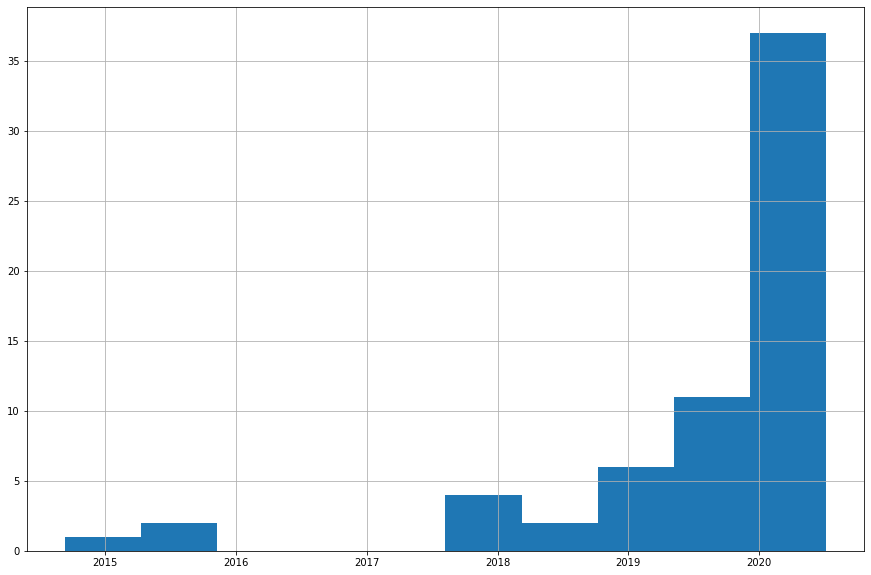

In [61]:
#df[['listingInfo-startTime', 'listingInfo-endTime']]
plt.figure(figsize=(15,10))
pd.to_datetime(df['listingInfo-startTime']).hist()

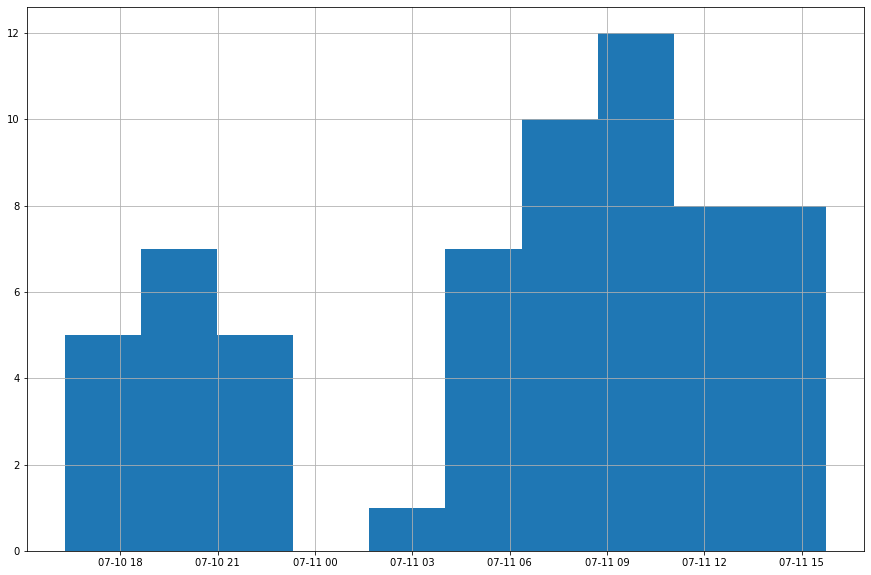

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
pd.to_datetime(df['listingInfo-endTime']).hist()

In [76]:
response1.dict()

{'Timestamp': '2020-07-07T23:50:26.988Z',
 'Ack': 'Success',
 'Build': 'E1141_CORE_APILW_19170841_R1',
 'Version': '1141',
 'Item': {'ItemID': '133453040314',
  'EndTime': '2020-07-30T20:32:22.000Z',
  'ViewItemURLForNaturalSearch': 'https://www.ebay.com/itm/NEW-Soprano-Saxophone-FREE-Shipping-inside-continental-US-/133453040314',
  'ListingType': 'FixedPriceItem',
  'Location': 'Tipton, Missouri',
  'GalleryURL': 'https://thumbs3.ebaystatic.com/pict/1334530403148080_1.jpg',
  'PictureURL': ['https://i.ebayimg.com/00/s/MTYwMFgyODk=/z/O94AAOSw8-5e-5up/$_57.JPG?set_id=8800005007',
   'https://i.ebayimg.com/00/s/MzAwWDQwMA==/z/xIAAAOSww3Ze-5u0/$_57.JPG?set_id=8800005007',
   'https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/jpYAAOSwmQNe-5vA/$_57.JPG?set_id=8800005007'],
  'PrimaryCategoryID': '16231',
  'PrimaryCategoryName': 'Musical Instruments & Gear:Wind & Woodwind:Band & Orchestral:Saxophones',
  'BidCount': '0',
  'ConvertedCurrentPrice': {'_currencyID': 'USD', 'value': '100.0'},
  'Listin

In [71]:
response.dict()['searchResult']['item'][0]

{'itemId': '233642929384',
 'title': 'King Tempo Baritone Saxophone w/ Gig Bag',
 'globalId': 'EBAY-US',
 'primaryCategory': {'categoryId': '16231', 'categoryName': 'Saxophones'},
 'galleryURL': 'https://thumbs1.ebaystatic.com/m/mLtHjVyIfYTB6dzpzXRrmVQ/140.jpg',
 'viewItemURL': 'https://www.ebay.com/itm/King-Tempo-Baritone-Saxophone-w-Gig-Bag-/233642929384',
 'paymentMethod': 'PayPal',
 'autoPay': 'false',
 'postalCode': '333**',
 'location': 'Fort Lauderdale,FL,USA',
 'country': 'US',
 'storeInfo': {'storeName': 'MAE Music',
  'storeURL': 'http://stores.ebay.com/MAE-Music'},
 'sellerInfo': {'sellerUserName': 'mae-music',
  'feedbackScore': '1475',
  'positiveFeedbackPercent': '100.0',
  'feedbackRatingStar': 'Red',
  'topRatedSeller': 'false'},
 'shippingInfo': {'shippingServiceCost': {'_currencyId': 'USD',
   'value': '50.0'},
  'shippingType': 'Flat',
  'shipToLocations': 'Worldwide',
  'expeditedShipping': 'false',
  'oneDayShippingAvailable': 'false',
  'handlingTime': '2'},
 'sel

In [72]:
response.dict()['paginationOutput']

{'pageNumber': '1',
 'entriesPerPage': '10',
 'totalPages': '476',
 'totalEntries': '4752'}

In [73]:
df = pd.io.json.json_normalize(response.dict()['searchResult']['item'],  sep='-')


Index(['itemId', 'title', 'globalId', 'galleryURL', 'viewItemURL',
       'paymentMethod', 'autoPay', 'postalCode', 'location', 'country',
       'returnsAccepted', 'isMultiVariationListing', 'topRatedListing',
       'primaryCategory-categoryId', 'primaryCategory-categoryName',
       'storeInfo-storeName', 'storeInfo-storeURL',
       'sellerInfo-sellerUserName', 'sellerInfo-feedbackScore',
       'sellerInfo-positiveFeedbackPercent', 'sellerInfo-feedbackRatingStar',
       'sellerInfo-topRatedSeller',
       'shippingInfo-shippingServiceCost-_currencyId',
       'shippingInfo-shippingServiceCost-value', 'shippingInfo-shippingType',
       'shippingInfo-shipToLocations', 'shippingInfo-expeditedShipping',
       'shippingInfo-oneDayShippingAvailable', 'shippingInfo-handlingTime',
       'sellingStatus-currentPrice-_currencyId',
       'sellingStatus-currentPrice-value',
       'sellingStatus-convertedCurrentPrice-_currencyId',
       'sellingStatus-convertedCurrentPrice-value', 'selli

In [75]:
df[['itemId', 'title', 'viewItemURL', 'postalCode','sellerInfo-sellerUserName', 'shippingInfo-shippingServiceCost-_currencyId',
       'shippingInfo-shippingServiceCost-value', 'sellingStatus-currentPrice-_currencyId',
       'sellingStatus-currentPrice-value', 'listingInfo-bestOfferEnabled', 'listingInfo-buyItNowAvailable', 'listingInfo-startTime', 'listingInfo-endTime', 'listingInfo-watchCount','condition-conditionId', 'condition-conditionDisplayName']].set_index('itemId')

,title,viewItemURL,postalCode,sellerInfo-sellerUserName,shippingInfo-shippingServiceCost-_currencyId,shippingInfo-shippingServiceCost-value,sellingStatus-currentPrice-_currencyId,sellingStatus-currentPrice-value,listingInfo-bestOfferEnabled,listingInfo-buyItNowAvailable,listingInfo-startTime,listingInfo-endTime,listingInfo-watchCount,condition-conditionId,condition-conditionDisplayName
itemId,,,,,,,,,,,,,,,
233642929384,King Tempo Baritone Saxophone w/ Gig Bag,https://www.ebay.com/itm/King-Tempo-Baritone-S...,333**,mae-music,USD,50.0,USD,500.0,false,true,2020-07-07T18:19:21.000Z,2020-07-14T18:19:21.000Z,9,3000,Used
133453040314,NEW Soprano Saxophone *FREE Shipping* inside t...,https://www.ebay.com/itm/NEW-Soprano-Saxophone...,650**,scottbabs,USD,0.0,USD,100.0,false,false,2020-06-30T20:32:22.000Z,2020-07-30T20:32:22.000Z,55,1000,New
283938622116,Conn Virtuoso Deluxe Alto Gold Plate Full Pear...,https://www.ebay.com/itm/Conn-Virtuoso-Deluxe-...,871**,zapatista,USD,89.0,USD,3997.0,true,false,2020-07-06T00:55:50.000Z,2020-08-06T00:55:50.000Z,10,3000,Used
174340600156,Conn Naked Lady Alto Saxophone 6M Serial Numbe...,https://www.ebay.com/itm/Conn-Naked-Lady-Alto-...,323**,puppe_4442,USD,40.0,USD,1000.0,true,false,2020-07-07T01:06:46.000Z,2020-08-07T01:06:46.000Z,3,3000,Used
383620988614,Vintage Conn C melody Sax 1921,https://www.ebay.com/itm/Vintage-Conn-C-melody...,625**,miwea-55,USD,50.0,USD,300.0,true,false,2020-07-07T06:11:04.000Z,2020-08-07T06:11:04.000Z,3,3000,Used
264781382394,Vintage Rare LeBlanc System Vito Stencil Alto ...,https://www.ebay.com/itm/Vintage-Rare-LeBlanc-...,431**,junkdude-com,USD,65.0,USD,495.0,false,false,2020-07-01T02:34:42.000Z,2020-07-08T02:34:42.000Z,15,3000,Used
264782422788,CANNONBALL BIG BELL STONE SERIES ALTO SAXOPHON...,https://www.ebay.com/itm/CANNONBALL-BIG-BELL-S...,338**,jlovesyolie,USD,55.0,USD,1500.0,false,false,2020-07-02T01:07:57.000Z,2020-08-02T01:07:57.000Z,17,2500,Seller refurbished
333647681824,Yamaha YTS-200AD Advantage Tenor Saxophone Use...,https://www.ebay.com/itm/Yamaha-YTS-200AD-Adva...,333**,mae-music,USD,50.0,USD,157.5,false,false,2020-07-07T15:26:17.000Z,2020-07-14T15:26:17.000Z,11,3000,Used
193545530788,YAMAHA YAS-23 SAXOPHONE (FE3036256),https://www.ebay.com/itm/YAMAHA-YAS-23-SAXOPHO...,543**,stdauctions,USD,25.0,USD,270.0,false,false,2020-07-01T02:03:31.000Z,2020-07-08T02:03:31.000Z,21,3000,Used


In [15]:
from ebaysdk.shopping import Connection as Shopping

api_shop = Shopping(config_file = 'ebay.yaml')

def getItemSpecifics(ItemID):
    api_request = {
    'ItemID': ItemID,
    'IncludeSelector' : 'ItemSpecifics'}
    response = api_shop.execute('GetSingleItem', api_request)
    return {item['Name'] : item['Value'] for item in response1.dict()['Item']['ItemSpecifics']['NameValueList']}


{'Modified Item': 'No',
 'Country/Region of Manufacture': 'China',
 'Custom Bundle': 'No',
 'Body Finish': 'Gold Lacquer',
 'Type': 'Soprano',
 'MPN': 'Does Not Apply',
 'Key Finish': 'Gold Lacquered',
 'Body Material': 'Brass',
 'Brand': 'Simba Instruments',
 'Skill Level': 'Beginner',
 'UPC': 'Does not apply'}